<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#a)" data-toc-modified-id="a)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>a)</a></span></li><li><span><a href="#b)" data-toc-modified-id="b)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>b)</a></span></li><li><span><a href="#c)" data-toc-modified-id="c)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>c)</a></span><ul class="toc-item"><li><span><a href="#He-atoms-Double-Slit" data-toc-modified-id="He-atoms-Double-Slit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>He-atoms Double Slit</a></span></li></ul></li></ul></div>

In [161]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

In [162]:
# Physical constants
hbar = 6.63*10**(-34) / ( 2*np.pi )     # Reduced Planck's constant [Js]
m_el = 3.109*10**(-31)                  # Electron mass [kg]
m_proton = 1.67 * 10**(-27)             # Proton mass [kg]
m_neutron = 1.67 * 10**(-27)            # Neutron mass [kg]
m_helium = 2*m_proton + 2*m_neutron     # Helium atom mass [kg]

In [163]:
# function which returns the wavefunction of the wave packet
def psi(x, t, v, m, sigma):    
    k0 = v * m / hbar 
    omega0 = hbar*k0**2 / ( 2*m ) 
    
    C = np.sqrt(sigma) / ( np.pi**(0.25) * np.sqrt( sigma**2 + 1j*hbar*t / m ) )
    phase = np.e**( 1j*( k0*x - omega0*t ))
    
    return C * phase * np.exp( -0.5*(x - v*t)**2 / ( sigma**2 + 1j*hbar*t / m ) ) 

In [164]:
# function which gives the full width half maximum
# which is a measure of the width of the wavefunction
def fwhm(x, f):
    hm = np.max(f)/2
    maxarg = np.argmax(f)
    s = np.argmin(np.abs(hm - f))
    return 2*np.abs(np.abs(x[maxarg]) - np.abs(x[s]))

# function which calculates the integral numerically
def trap(f, h):
    intgr = 0.5 * h * (f[0] + f[-1])
    for i in range(1, f.shape[0]-1):
        intgr = intgr + h * f[i]
    return intgr

# a)

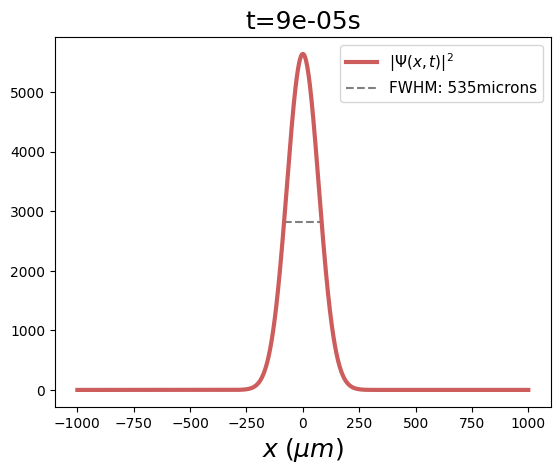

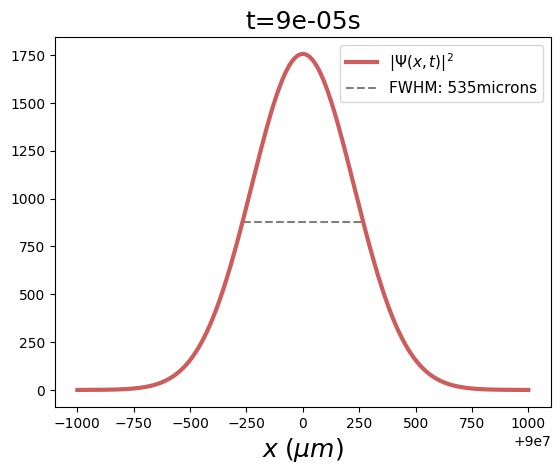


Width expansion 3.214187906929961


In [167]:
sigma = 0.0001                   # Width of Gaussian [m]
v_el = 10**(6)                   # Velocity of electron [m/s]

t_1 = 0
x = np.linspace(-10*sigma, 10*sigma, 1000000) 
psi_1 = psi(x, t_1, v_el, m_el, sigma)
width_1 = fwhm(x, np.abs(psi_1)**2) 

plt.plot(x * 10**(6), np.abs(psi_1)**2, c="indianred", lw=3, label=r"$|\Psi(x,t)|^2$")
plt.hlines(0.5*np.max(np.abs(psi_1)**2), 
            xmin=(v_el*t_1 - width_1/2) * 10**(6), xmax=(v_el*t_1 + width_1/2) * 10**(6), 
           color= 'gray', ls="--", label=f"FWHM: { width_2*10**6 :.0f}microns")
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_2}s", fontsize=18)
plt.legend(fontsize=11)
plt.show()

t_2 = 9.*10**(-5)
x = np.linspace(-10*sigma + v_el*t_2, 10*sigma + v_el*t_2, 1000000) 
psi_1 = psi(x, t_2, v_el, m_el, sigma)
width_2 = fwhm(x, np.abs(psi_1)**2)

plt.plot(x * 10**(6), np.abs(psi_1)**2, c="indianred", lw=3, label=r"$|\Psi(x,t)|^2$")
plt.hlines(0.5*np.max(np.abs(psi_1)**2), 
            xmin=(v_el*t_2 - width_2/2) * 10**(6), xmax=(v_el*t_2 + width_2/2) * 10**(6), 
           color= 'gray', ls="--", label=f"FWHM: { width_2*10**6 :.0f}microns")
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_2}s", fontsize=18)
plt.legend(fontsize=11)
plt.show()

print(f"\nWidth expansion {width_2 / width_1}")

# b)

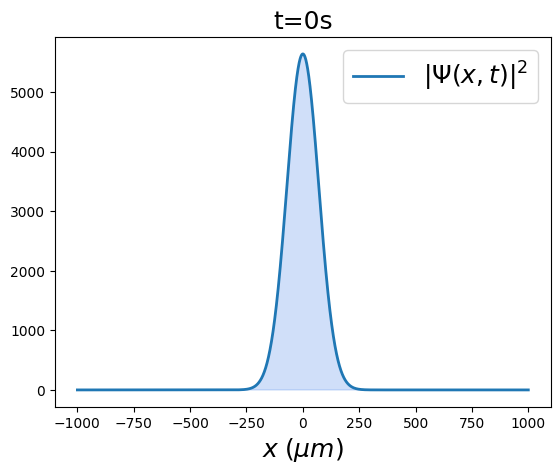

Intagral over absolute square at t=0:  1.000000000000234


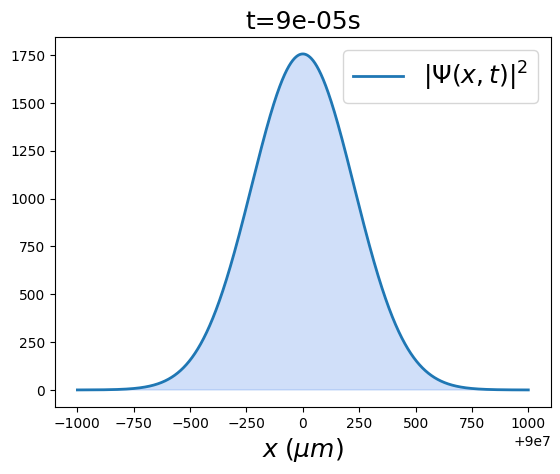

Intagral over absolute square at t=9e-05:  0.9999892046150408


In [126]:
sigma = 0.0001                   # Width of Gaussian [m]
v_el = 10**(6)                   # Velocity of electron [m/s]

t_1 = 0
x = np.linspace(-10*sigma, 10*sigma, 100000) 
psi_1 = psi(x, t_1, v_el, m_el, sigma)

plt.plot(x * 10**(6), np.abs(psi_1)**2, lw=2, label=r"$|\Psi(x,t)|^2$")
plt.fill(x * 10**(6), np.abs(psi_1)**2, c="cornflowerblue", alpha=0.3)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_1}s", fontsize=18)
plt.legend(fontsize=18)
plt.show()

integral = trap(np.abs(psi_1)**2, np.abs(x[0]-x[1]))
print(f"Intagral over absolute square at t={t_1}:  {integral}")

t_2 = 9.*10**(-5)
x = np.linspace(-10*sigma + v_el*t_2, 10*sigma + v_el*t_2, 100000) 
psi_1 = psi(x, t_2, v_el, m_el, sigma)

plt.plot(x * 10**(6), np.abs(psi_1)**2, lw=2, label=r"$|\Psi(x,t)|^2$")
plt.fill(x * 10**(6), np.abs(psi_1)**2, c="cornflowerblue", alpha=0.3)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_2}s", fontsize=18)
plt.legend(fontsize=18)
plt.show()

integral = trap(np.abs(psi_1)**2, np.abs(x[0]-x[1]))
print(f"Intagral over absolute square at t={t_2}:  {integral}")

The integral evaluates to one for both $t_1$ og $t_2$. The wave packet is still normalized at $t=9\times 10^{-5}$s. 

# c)

3.330163330163329


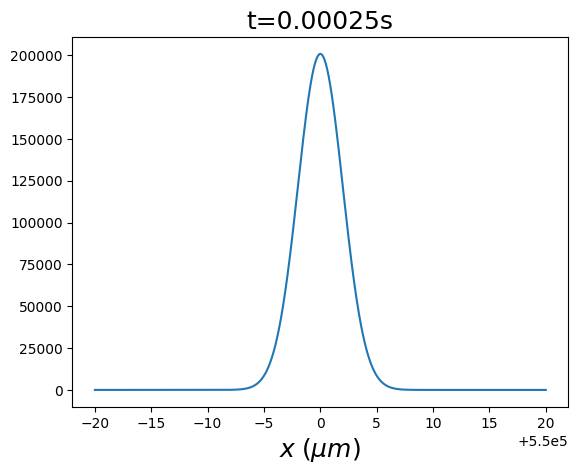

FWHM: 4.68 microns
Distance travelled 0.55 m
Time elapsed 0.00025 s
Width expansion since initial state: 1.405289835903777


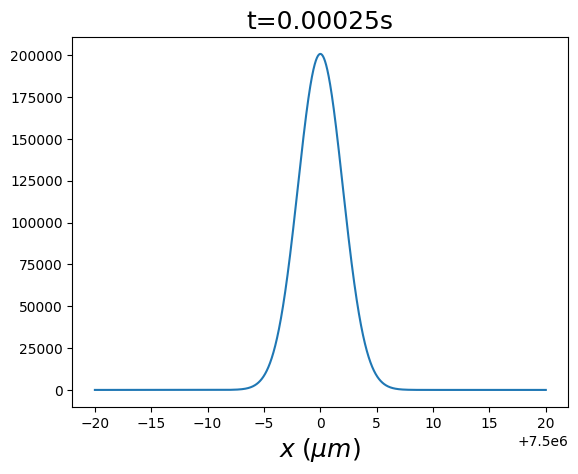

FWHM: 4.68 microns
Distance travelled 7.5 m
Time elapsed 0.00025 s
Width expansion since initial state: 1.4052658133227474


In [129]:
# Width of Gaussian [m]
sigma = 2*10**(-6)              

# Velocities of Helium atoms [m/s]
v_1 = 2.2 * 10**(3)   
v_2 = 30 * 10**(3)

# Distance to screen in He double-slit experiment [m]
L = 1.95

# Initial wavepacket
t_1 = 0
x = np.linspace(-10*sigma, 10*sigma, 1000000) 
psi_1 = psi(x, t_1, v_1, m_helium, sigma)
# plt.plot(x * 10**(6), np.abs(psi_1)**2)
# plt.xlabel(r"$ x \; [\mu m]$")
# plt.title(f"t={t_1}s")
# plt.show()
width_initial = fwhm(x, np.abs(psi_1)**2) * 10**(6)
print(width_initial)

t_2  = 0.00025

# Wavepacket at t_2 [slow]
x = np.linspace(-10*sigma + v_1*t_2, 10*sigma + v_1*t_2, 1000000) 
psi_1 = psi(x, t_2, v_1, m_helium, sigma)
plt.plot(x* 10**(6), np.abs(psi_1)**2)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_2}s", fontsize=18)
plt.show()
width_1 = fwhm(x, np.abs(psi_1)**2) * 10**(6)
print(f"FWHM: {width_1:.2f} microns")
print(f"Distance travelled {v_1*t_2} m")
print(f"Time elapsed {t_2} s")
print(f"Width expansion since initial state: {width_1 / width_initial}")

# Wavepacket at t_2 [fast]
x = np.linspace(-10*sigma + v_2*t_2, 10*sigma + v_2*t_2, 1000000) 
psi_1 = psi(x , t_2, v_2, m_helium, sigma)
plt.plot(x* 10**(6), np.abs(psi_1)**2)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_2}s", fontsize=18)
plt.show()
width_2 = fwhm(x, np.abs(psi_1)**2) * 10**(6)
print(f"FWHM: {width_2:.2f} microns")
print(f"Distance travelled {v_2*t_2} m")
print(f"Time elapsed {t_2} s")
print(f"Width expansion since initial state: {width_2 / width_initial}")

For the wavepackets describing He it takes 0.25 ms for the wavepacket to expand 40\%. In this time the fast wavepacket moves 7.5m wheras the slow wavepacket moves 0.55m. 

The faster He atoms moves so fast that they don't expand much when they arrive at the screen in the He double slit experiment. Whereas the slower electron takes longer to arrive at the screen and therefore have time to expand significantly. That is the reason why the wavefunction from slit one can interfere with the wavefunction from slit two, for the slower He-atoms.

## He-atoms Double Slit

FWHM 3.3302 micron


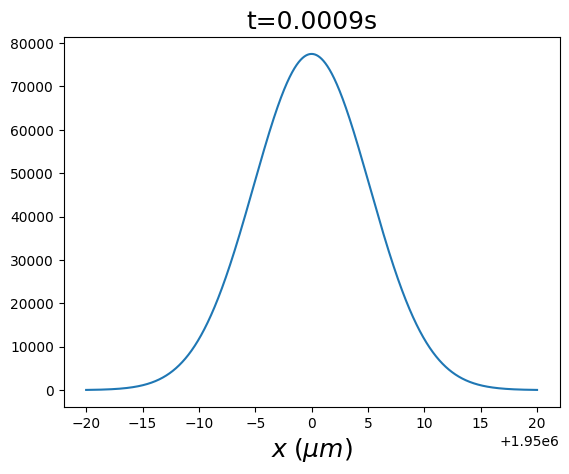

FWHM 12.1232 microns
Distance travelled 1.95 m
Time 0.0008863636363636363 s
Width expansion since initial state: 3.6404


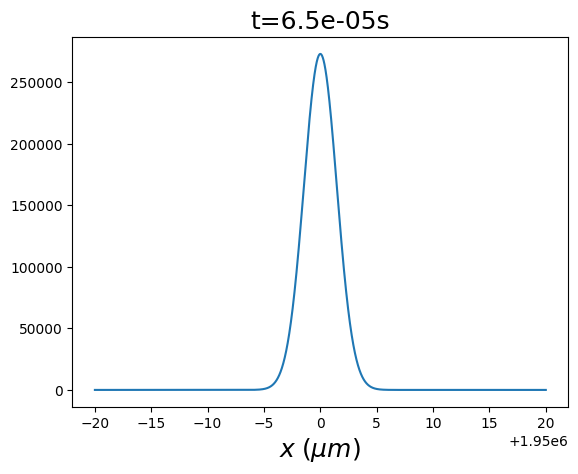

FWHM 3.4382 microns
Distance travelled 1.9500 m
Time 6.5e-05 s
Width expansion since initial state: 1.0324


In [135]:
# Width of Gaussian [m]
sigma = 2*10**(-6)              

# Velocities of Helium atoms [m/s]
v_1 = 2.2 * 10**(3)   
v_2 = 30 * 10**(3)

# Distance to screen in He double-slit experiment [m]
L = 1.95

# Initial wavepacket
t_1 = 0
x = np.linspace(-10*sigma, 10*sigma, 1000000) 
psi_1 = psi(x, t_1, v_1, m_helium, sigma)
width_initial = fwhm(x, np.abs(psi_1)**2) * 10**(6)
print(f"FWHM {width_initial:.4f} micron")


# Wavepacket at screen [slow]
t_2 = L / v_1
x = np.linspace(-10*sigma + v_1*t_2, 10*sigma + v_1*t_2, 1000000) 
psi_1 = psi(x, t_2, v_1, m_helium, sigma)
plt.plot(x * 10**(6), np.abs(psi_1)**2)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_2:.4f}s", fontsize=18)
plt.show()
width_1 = fwhm(x, np.abs(psi_1)**2) * 10**(6)
print(f"FWHM {width_1:.4f} microns")
print(f"Distance travelled {v_1*t_2:.4} m")
print(f"Time {t_2} s")
print(f"Width expansion since initial state: {width_1 / width_initial:.4f}")

# Wavepacket at screen [fast]
t_2 = L / v_2
x = np.linspace(-10*sigma + v_2*t_2, 10*sigma + v_2*t_2, 1000000) 
psi_1 = psi(x, t_2, v_2, m_helium, sigma)
plt.plot(x * 10**(6), np.abs(psi_1)**2)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"t={t_2}s", fontsize=18)
plt.show()
width_2 = fwhm(x, np.abs(psi_1)**2) * 10**(6)
print(f"FWHM {width_2:.4f} microns")
print(f"Distance travelled {v_2*t_2:.4f} m")
print(f"Time {t_2} s")
print(f"Width expansion since initial state: {width_2 / width_initial:.4f}")

The slow travelling He-atoms have expanded to more than three times their 
original size by the time they hit the screen, whereas the faster He-atoms expand only 3 percent.

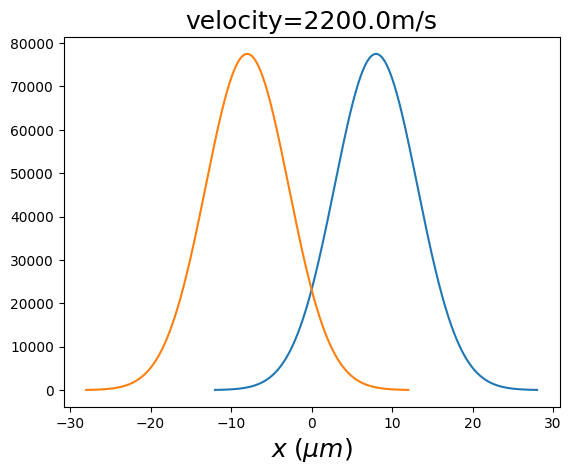

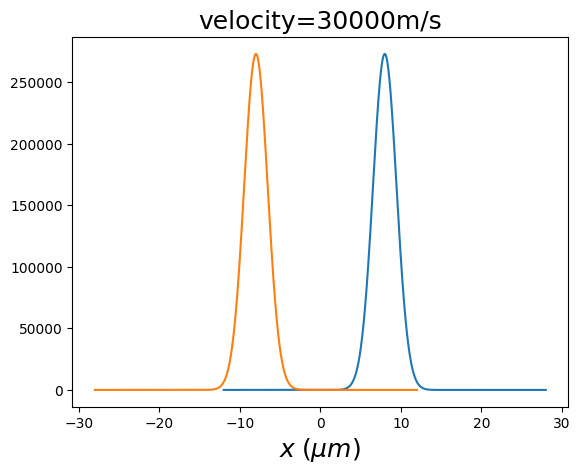

In [157]:
d = 8 

# Wavepacket at screen [slow]
t_1 = L / v_1
x = np.linspace(-10*sigma + v_1*t_1, 10*sigma + v_1*t_1, 1000000) 

psi_1 = psi(x, t_1, v_1, m_helium, sigma)

x = np.linspace(-10*sigma, 10*sigma, 1000000) 

plt.plot(d + x * 10**(6), np.abs(psi_1)**2)
plt.plot(-d + x * 10**(6), np.abs(psi_1)**2)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"velocity={v_1}m/s", fontsize=18)
plt.show()

# Wavepacket at screen [fast]
t_2 = L / v_2
x = np.linspace(-10*sigma + v_2*t_2, 10*sigma + v_2*t_2, 1000000) 

psi_1 = psi(x, t_2, v_2, m_helium, sigma)

x = np.linspace(-10*sigma, 10*sigma, 1000000) 

plt.plot(d + x * 10**(6), np.abs(psi_1)**2)
plt.plot(-d + x * 10**(6), np.abs(psi_1)**2)
plt.xlabel(r"$ x \; (\mu m)$", fontsize=18)
plt.title(f"velocity={v_2}m/s", fontsize=18)
plt.show()

We thus see that for the faster He-atoms, the wavefunctions overlap significantly when they go thorugh the slits and arrive at the screen. Whereas for the for the fast He-atoms there is no significant overlap, so the wavefunctions cannot interfere with each other.